In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import scipy.io as sio
import curveball

In [2]:
mat = sio.loadmat('../data/growth/YPD_39deg_RefinedB_vs_TrisomicB.mat')
times = mat['tps'][0] / 60/60
r1 = [0,1,0,1,0,1,0,1,0,1,0,1]
r2 = [1,0,1,0,1,0,1,0,1,0,1,0]
r = [r1,r2,r1,r2,r1,r2,r1,r2]
r = np.array(r).reshape(-1)
r = ['refined' if i==0 else 'trisomic' for i in r]

/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


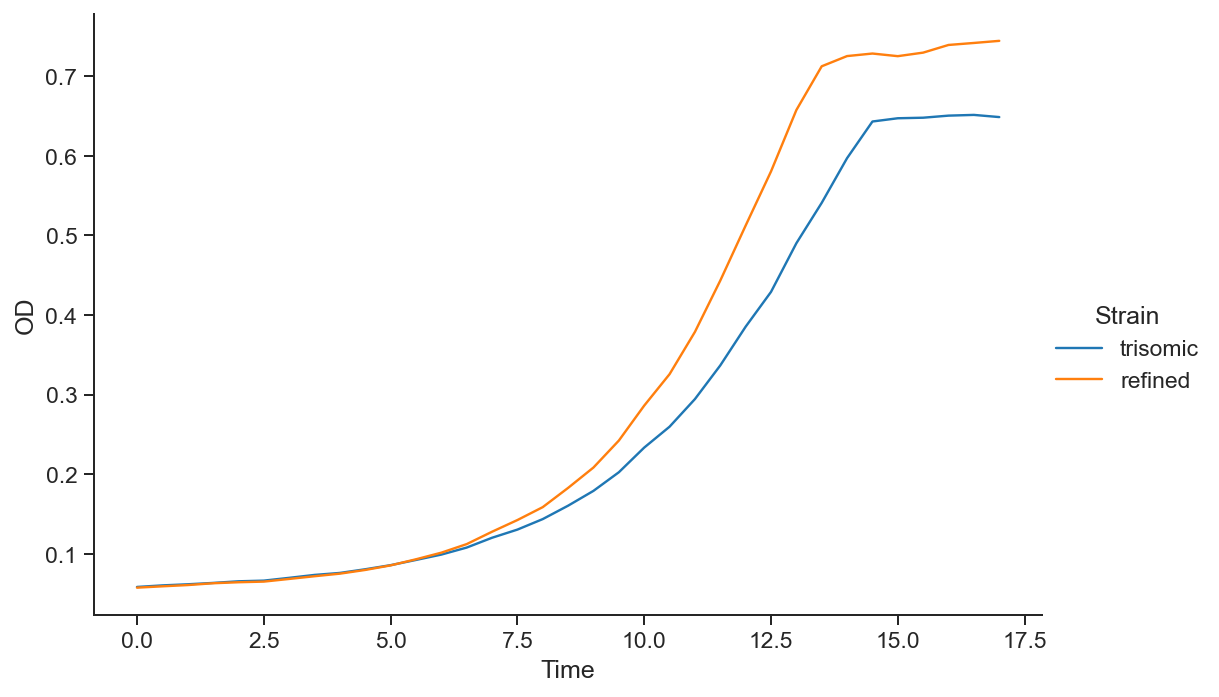

In [28]:
mat = sio.loadmat('../data/growth/YPD_39deg_RefinedB_vs_TrisomicB.mat')
plate = mat['plate_mat']
df = pd.DataFrame(data=plate).T
df.columns = list(zip(r,range(96)))
df['Time'] = list(times)
df = pd.melt(df, id_vars='Time', var_name='Strain-Index', value_name='OD')
df['Strain'] = df['Strain-Index'].apply(lambda x:x[0])
df['Index'] = df['Strain-Index'].apply(lambda x:x[1])
# df = df[~df['Index'].isin([ 0, 13, 24, 26, 80, 82, 89, 91])] #refined 85% on time 10
df = df[~df['Index'].isin([ 4, 30, 37, 39, 58])] #refined additiona anomalies manual
# df = df[~df['Index'].isin([ 1,  3,  9, 11, 12, 33, 36, 60])] #trisomic 85% on time 10

df = df[~df['Index'].isin([ 0,  2, 13, 15, 24, 26, 28, 37, 39, 45, 69, 72, 78, 80, 82, 87, 89,91, 93, 95])]
df = df[~df['Index'].isin([ 1,  3,  9, 11, 12, 14, 16, 25, 27, 33, 36, 40, 60, 70, 77, 81, 84,88, 90, 94])]
curveball.plots.plot_strains(df)

In [29]:
np.array(times) # we see that times from evo39 excel is pretty simillar, but here is one more

array([ 0.        ,  0.5       ,  0.99972222,  1.50027778,  1.99972222,
        2.50027778,  2.99972222,  3.50027778,  4.        ,  4.5       ,
        5.00027778,  5.49972222,  5.99944444,  6.49944444,  6.99944444,
        7.49972222,  7.99944444,  8.49972222,  8.99944444,  9.49972222,
        9.99944444, 10.49972222, 10.99972222, 11.49972222, 11.99972222,
       12.49972222, 13.        , 13.49944444, 13.99944444, 14.5       ,
       14.99944444, 15.5       , 15.99944444, 16.49972222, 17.        ])

In [30]:
df = df[df['Time'] <= 12]

In [31]:
df_evo30 = df[df['Strain']=='trisomic']
df_evo39 = df[df['Strain']=='refined']

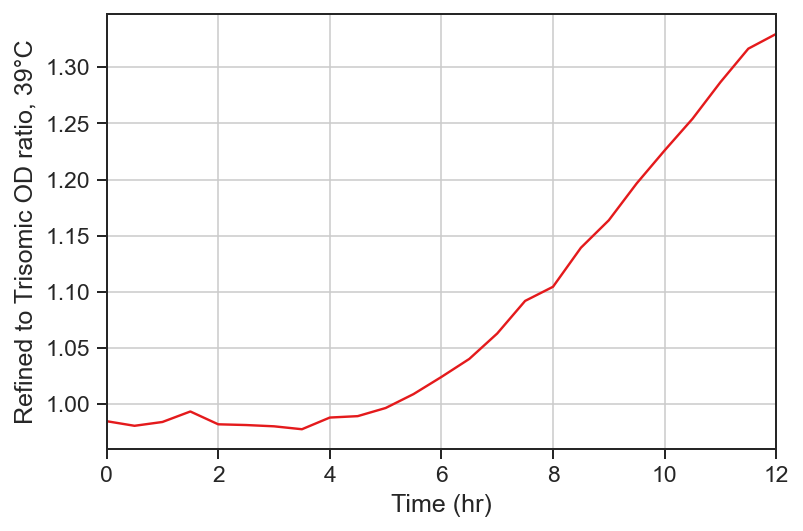

In [32]:

deg = 39
fig, ax = plt.subplots()
od_ratio = df_evo39.groupby('Time').mean() / df_evo30.groupby('Time').mean()
ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 12), xlabel='Time (hr)', ylabel='Refined to Trisomic OD ratio, {}°C'.format(deg))
ax.grid(True);

[[Model]]
    Model(LogisticLag1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 154
    # data points      = 700
    # variables        = 4
    chi-square         = 0.02691824
    reduced chi-square = 3.8676e-05
    Akaike info crit   = -7108.22210
    Bayesian info crit = -7090.01778
[[Variables]]
    y0:  0.05897029 +/- 5.2835e-04 (0.90%) (init = 0.05839286)
    K:   2.99101021 +/- 0.85049227 (28.43%) (init = 0.38525)
    r:   0.34435178 +/- 0.00837645 (2.43%) (init = 1.076273)
    q0:  0.11524787 +/- 0.00926181 (8.04%) (init = 0.05079271)


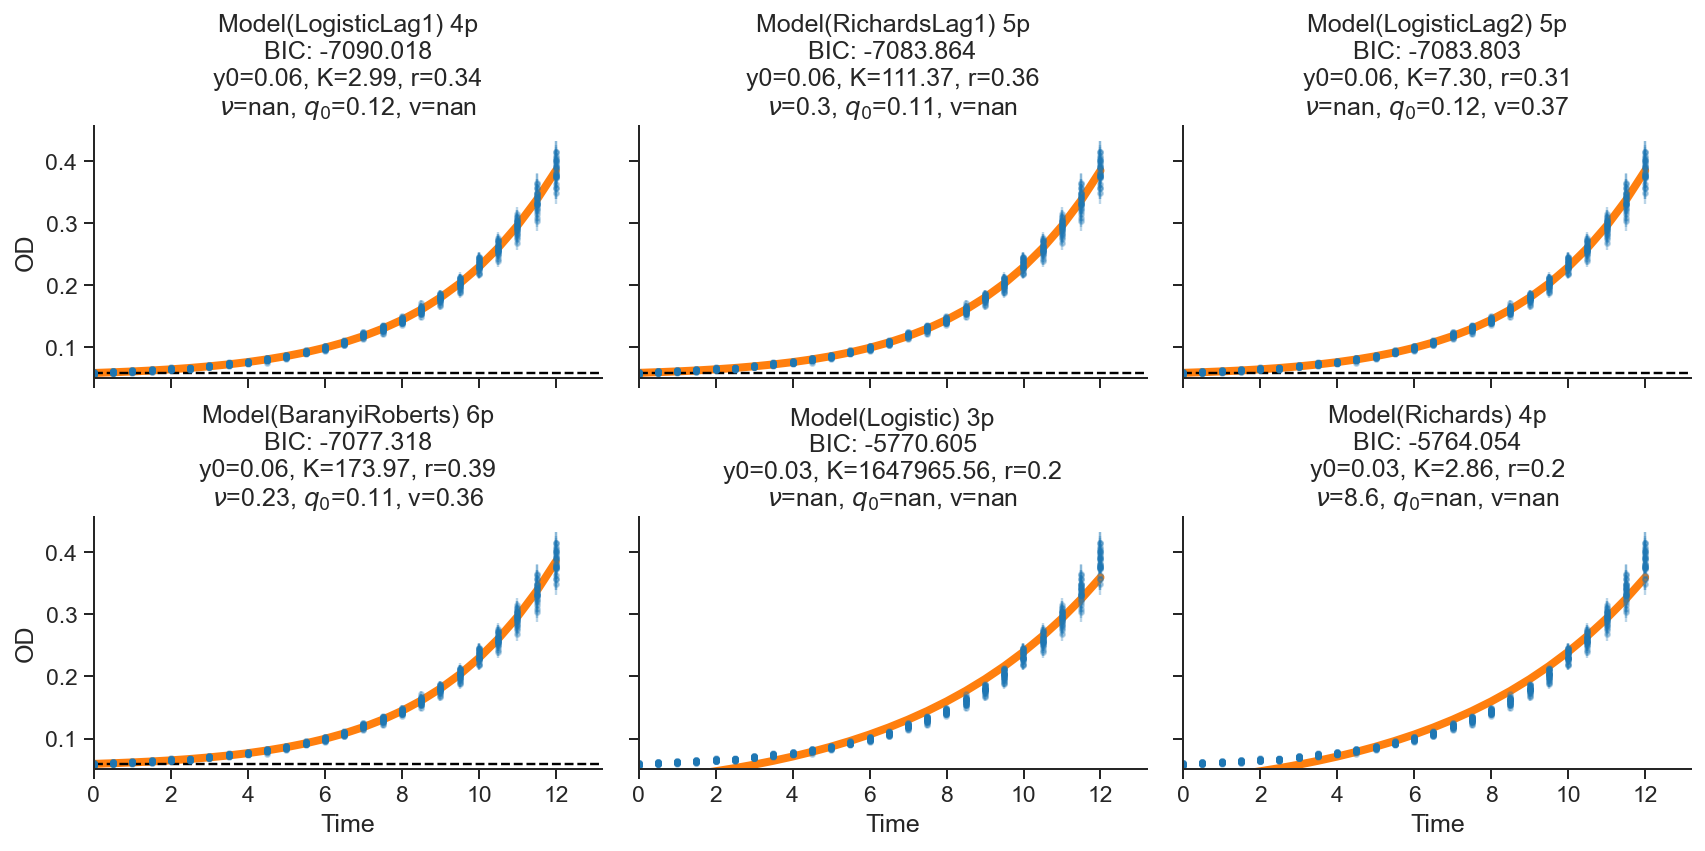

In [33]:
m_evo30, fig, axes = curveball.models.fit_model(df_evo30)

[[Model]]
    Model(LogisticLag1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 116
    # data points      = 625
    # variables        = 4
    chi-square         = 0.03581914
    reduced chi-square = 5.7680e-05
    Akaike info crit   = -6096.39028
    Bayesian info crit = -6078.63927
[[Variables]]
    y0:  0.05837872 +/- 6.3142e-04 (1.08%) (init = 0.057508)
    K:   2.26963987 +/- 0.27045435 (11.92%) (init = 0.512248)
    r:   0.41201722 +/- 0.00786205 (1.91%) (init = 1.212694)
    q0:  0.07768330 +/- 0.00611964 (7.88%) (init = 0.04869039)


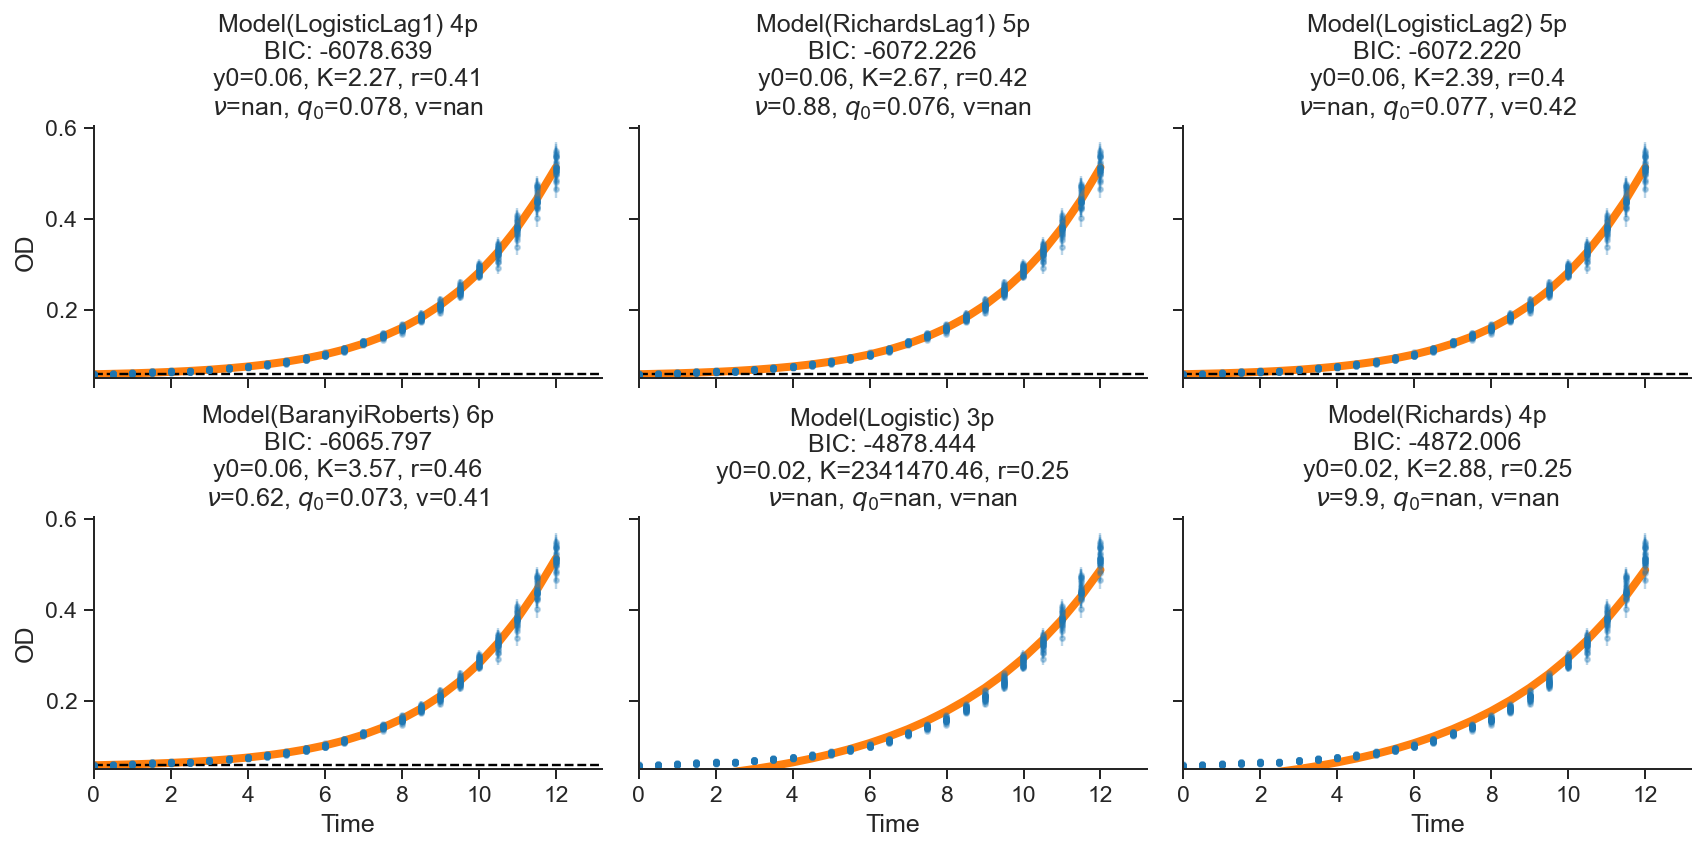

In [34]:
m_evo39, fig, axes = curveball.models.fit_model(df_evo39)

In [35]:
y0 = (m_evo30[0].params['y0'].value, m_evo39[0].params['y0'].value)
print(y0)
y0 = np.mean(y0)/2, np.mean(y0)/2
print(y0)

(0.05897028852415209, 0.05837872435650171)
(0.02933725322016345, 0.02933725322016345)


/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/curveball/competitions.py:343: UserWarning: 4 resamples lost
  warnings.warn("{0} resamples lost".format(nsamples - min_nsamples))


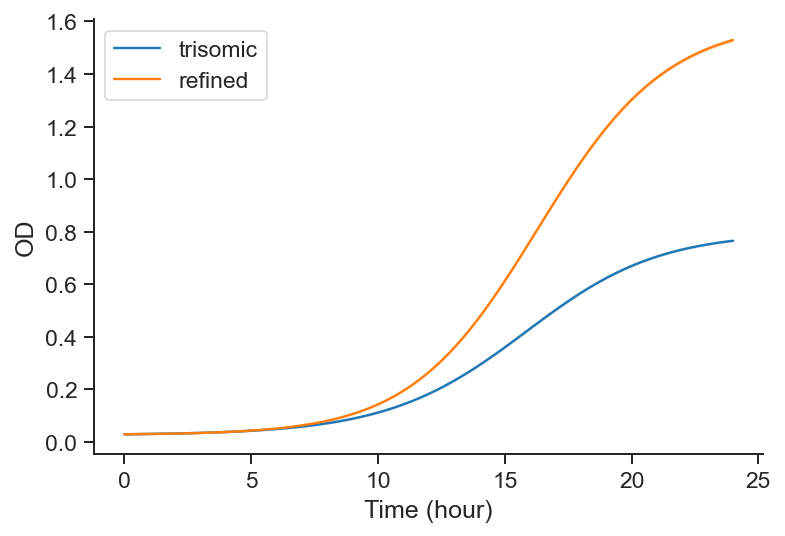

In [36]:
t, y, fig, ax = curveball.competitions.compete(m_evo30[0], m_evo39[0], y0=y0, PLOT=True, nsamples=10000)
# y = y.squeeze()
ax.legend(['trisomic', 'refined']);

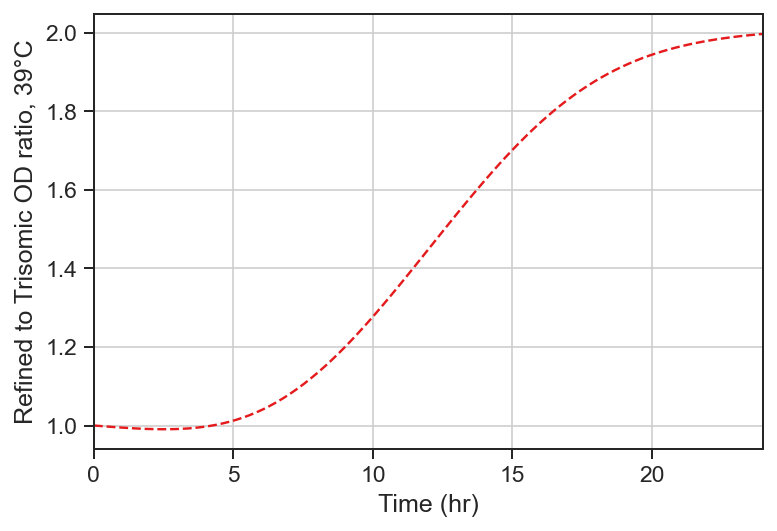

In [37]:
fig, ax = plt.subplots()

od_ratio_hat = y[:, 1].mean(axis=1)/y[:, 0].mean(axis=1)
ax.plot(t, od_ratio_hat, color=red, ls='--')
# ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 24), xlabel='Time (hr)', ylabel='Refined to Trisomic OD ratio, 39°C')
ax.grid(True)

/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


w = 1.0319 (95% CI 1.0238 - 1.0407)


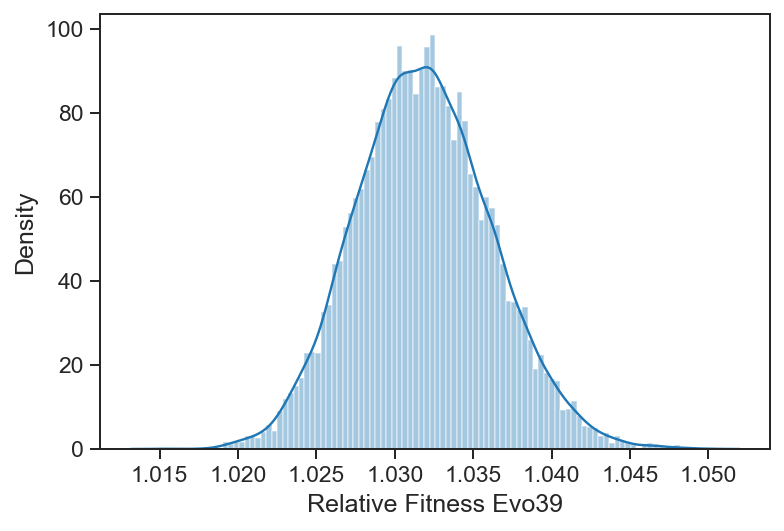

In [38]:
w = np.array([curveball.competitions.fitness_LTEE(y[:,:,i]) for i in range(y.shape[2])])
s = w - 1
s  /= np.log2(100) # convert from 24 hr to generations
w = 1 + s
ax = sns.distplot(w, bins=100, kde=True)
ax.set(xlabel='Relative Fitness Evo39', ylabel='Density');
print("w = {:.4f} (95% CI {:.4f} - {:.4f})".format(
    w.mean(), np.percentile(w, 2.5), np.percentile(w, 97.5)
))

In [39]:
# np.savez_compressed('evo39_fitness_{}deg.npz'.format(deg), w)

/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


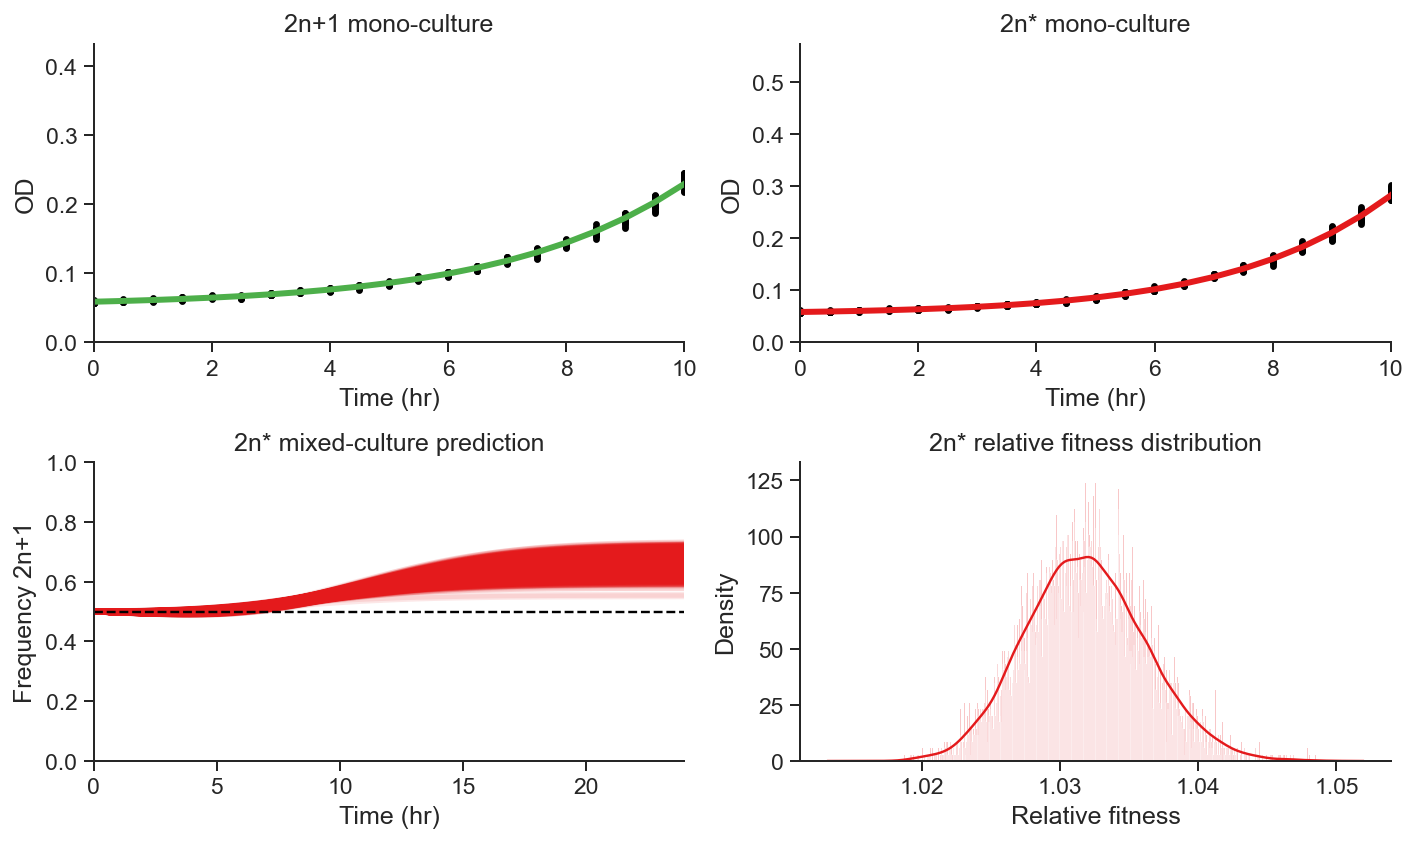

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
# mono-culture
data_kws = dict(color='k', marker='.')
evo30_kws = dict(color=green, lw=3)
evo39_kws = dict(color=red, lw=3)
m_evo30[0].plot_fit(ax=axes[0,0], fit_kws=evo30_kws, data_kws=data_kws)
m_evo39[0].plot_fit(ax=axes[0,1], fit_kws=evo39_kws, data_kws=data_kws)
for ax in axes[0]:
    ax.set(xlim=(0, None), ylim=(0, None))
axes[0,0].set(title="2n+1 mono-culture", ylabel='OD', xlabel='Time (hr)', xlim=(0,10))
axes[0,1].set(title="2n* mono-culture", ylabel='OD', xlabel='Time (hr)', xlim=(0,10))

# competition
axes[1,0].plot(t, y[:,1,:]/y.sum(axis=1), **evo39_kws, alpha=0.1)
axes[1,0].set(title="2n* mixed-culture prediction", ylabel='Frequency 2n+1', xlim=(0,24), ylim=(0,1), xlabel='Time (hr)')
axes[1,0].axhline(0.5, ls='--', color='k')

# fitness
sns.distplot(w, bins=1000, kde=True, color=red,  ax=axes[1,1])
axes[1,1].set(title='2n* relative fitness distribution', xlabel='Relative fitness', ylabel='Density')

# leftovers
for ax in axes.flat:
    ax.legend().set_visible(False)   
    
fig.tight_layout()
sns.despine()
# fig.savefig('../figures/evo39_fitness_{}deg.pdf'.format(deg))